In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
%run CnotDecomp.ipynb #for importing ccx function

In [3]:
def completeGraphWalk(N,qc,qreg,qcoin):
    qc.swap(qreg[0:N],qcoin)
    return qc

def hadamardCoin(N,qc,qcoin):
    qc.h(qcoin)
    return qc

def grover3Coin(N,qc,qcoin):
    qc.h(qcoin)
    qc.x(qcoin)
    qc.h(qcoin[2])
    qc.toffoli(qcoin[0],qcoin[1],qcoin[2])
    qc.h(qcoin[2])
    qc.x(qcoin)
    qc.h(qcoin)
    qc.barrier()
    return qc

In [4]:
def getStateVector(qc):
    backend = Aer.get_backend('statevector_simulator')
    job_sim = execute(qc, backend=backend)
    result_sim = job_sim.result()
    print(result_sim.get_statevector())

def getMeas(qc):
    backend = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend=backend,shots=1000)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    plot_histogram(result_counts)


In [14]:
def oracle(marked,N):
    qreg = QuantumRegister(N)
    qcoin = QuantumRegister(N)
    qc = QuantumCircuit(qreg,qcoin)
    D= np.ones(2**N)
    D[marked] = -1
    qc.diagonal(D.tolist(),qreg)
    qc = transpile(qc,basis_gates =['cx','u3'],optimization_level=3)
    return qc

def runWalk(qc,qreg,qcoin,markedVertex,N,times):
    qcaux = oracle(markedVertex,N)
    qc.h(qreg)
    
    for i in range(times):
        qc.append(qcaux,range(2*N))
        qc.barrier()
        qc= grover3Coin(N,qc,qcoin)
        qc= completeGraphWalk(N,qc,qreg,qcoin)
        qc.barrier()
        
    return qc

In [17]:
N=3

qreg = QuantumRegister(N)
qcoin = QuantumRegister(N)
creg = ClassicalRegister(N)

qc = QuantumCircuit(qreg,qcoin,creg)

qc = runWalk(qc,qreg,qcoin,3,N,4)


qc.measure(qreg[0],creg[0])
qc.measure(qreg[1],creg[1])    
qc.measure(qreg[2],creg[2])    

qc.draw()

┌───┐┌─────────────┐ ░                                     ░          »
q133_0: ┤ H ├┤0            ├─░─────────────────────────────────────░──X───────»
        ├───┤│             │ ░                                     ░  │       »
q133_1: ┤ H ├┤1            ├─░─────────────────────────────────────░──┼──X────»
        ├───┤│             │ ░                                     ░  │  │    »
q133_2: ┤ H ├┤2            ├─░─────────────────────────────────────░──┼──┼──X─»
        └───┘│  circuit191 │ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  │  │  │ »
q134_0: ─────┤3            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──X──┼──┼─»
             │             │ ░ ├───┤├───┤       │  ├───┤├───┤      ░     │  │ »
q134_1: ─────┤4            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─────X──┼─»
             │             │ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░        │ »
q134_2: ─────┤5            ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░────────X─»
             └─────────────┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░          »
  c6_0: ══════════════════════════════════════════════════════════════════════»
                                                                              »
  c6_1: ══════════════════════════════════════════════════════════════════════»
                                                                              »
  c6_2: ══════════════════════════════════════════════════════════════════════»
                                                                              »
«         ░ ┌─────────────┐ ░                                     ░          »
«q133_0: ─░─┤0            ├─░─────────────────────────────────────░──X───────»
«         ░ │             │ ░                                     ░  │       »
«q133_1: ─░─┤1            ├─░─────────────────────────────────────░──┼──X────»
«         ░ │             │ ░                                     ░  │  │    »
«q133_2: ─░─┤2            ├─░─────────────────────────────────────░──┼──┼──X─»
«         ░ │  circuit191 │ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  │  │  │ »
«q134_0: ─░─┤3            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──X──┼──┼─»
«         ░ │             │ ░ ├───┤├───┤       │  ├───┤├───┤      ░     │  │ »
«q134_1: ─░─┤4            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─────X──┼─»
«         ░ │             │ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░        │ »
«q134_2: ─░─┤5            ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░────────X─»
«         ░ └─────────────┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░          »
«  c6_0: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«  c6_1: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«  c6_2: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░ ┌─────────────┐ ░                                     ░          »
«q133_0: ─░─┤0            ├─░─────────────────────────────────────░──X───────»
«         ░ │             │ ░                                     ░  │       »
«q133_1: ─░─┤1            ├─░─────────────────────────────────────░──┼──X────»
«         ░ │             │ ░                                     ░  │  │    »
«q133_2: ─░─┤2            ├─░─────────────────────────────────────░──┼──┼──X─»
«         ░ │  circuit191 │ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  │  │  │ »
«q134_0: ─░─┤3            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──X──┼──┼─»
«         ░ │             │ ░ ├───┤├───┤       │  ├───┤├───┤      ░     │  │ »
«q134_1: ─░─┤4            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─────X──┼─»
«         ░ │             │ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░        │ »
«q134_2: ─░─┤5            ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░────────X─»
«         ░ └─────────────┘ ░ └───┘└───

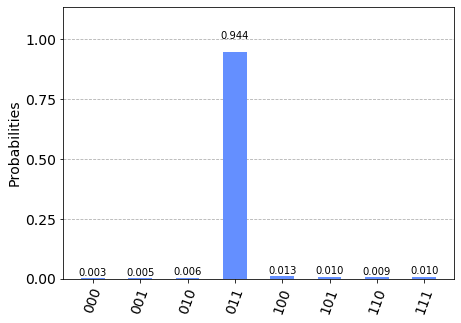

In [18]:

backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend=backend,shots=1000)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(qc)
plot_histogram(result_counts)